In [2]:
import re
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
from Bio import SeqIO

## Add peptide Info

In [17]:
gca_info = pd.read_table("all_GCA_after_blast_GCA.tsv")

In [18]:
gca_info

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,id_scores,consensus_support,reference_file_name,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source
0,SVLRPSQFGGQPCTEPLVAFQPCIPSK,GCA_179356,[105],[131],0.000556,1,['13|23-UNIMOD:4'],4390.1000,3,1000.843649,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,24970,NaN,NaN,NaN,NaN,NaN,GCA
1,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,33949,NaN,NaN,NaN,NaN,NaN,GCA
2,QSGGSSQAGAVTVSDVQELMR,"GCA_5200,GCA_5203,GCA_102666,GCA_102667",[8 8 8 8],[28 28 28 28],0.000556,0,NaN,4081.7000,2,1054.513854,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,21737,NaN,NaN,NaN,NaN,NaN,GCA
3,LGMIVDKIDVDKDGFVTEGELK,"GCA_118448,GCA_118449",[81 73],[102 94],0.000556,0,NaN,4128.1000,4,606.070749,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6929847...",NaN,01524_A01_P015424_S00_N01_R1,22238,NaN,NaN,NaN,NaN,NaN,GCA
4,SLPEETVDFMVQHTSFK,GCA_94965,[214],[230],0.000556,1,NaN,4693.2000,2,997.985107,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,28212,NaN,NaN,NaN,NaN,NaN,GCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '21-UNIMOD:7'],5189.1940,4,958.696960,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6929847...",NaN,01307_D05_P013386_S00_N36_R1,39778,NaN,NaN,NaN,NaN,NaN,GCA
128905,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4'],5638.0405,4,958.194336,...,"[""'OpenMS:Target-decoy PSM q-value': 6.3000874...",NaN,01307_D05_P013386_S00_N36_R1,43522,NaN,NaN,NaN,NaN,NaN,GCA
128906,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '19|21-UNIMOD:7' '27-UNIMOD:35'],5625.7710,4,962.948120,...,"[""'OpenMS:Target-decoy PSM q-value': 2.1532954...",NaN,01307_D05_P013386_S00_N36_R1,43420,NaN,NaN,NaN,NaN,NaN,GCA
128907,LLNLLADLVER,GCA_168207,[104],[114],0.000556,1,NaN,5904.1143,2,634.882690,...,"[""'OpenMS:Target-decoy PSM q-value': 5.7928041...",NaN,01307_D05_P013386_S00_N36_R1,45703,NaN,NaN,NaN,NaN,NaN,GCA


In [19]:
mod_rep = {"UNIMOD:4":"Carbamidomethyl","UNIMOD:7":"Deamidated","UNIMOD:35":"Oxidation","UNIMOD:1":"Acetyl"}
def replace_mod(mods):
    if pd.isna(mods):
        return ""
    else:
        pattern = r"'(.*?)'"
        x = re.findall(pattern, mods)
        s = ""
        for mod in x:
            nums = mod.split("-")[0]
            m = mod.split("-")[1]
            for n in nums.split("|"):
                if s:
                    s += "|"
                s += n + "|" + mod_rep.get(m)
        return s

In [20]:
gca_info.loc[:,"modifications"] = gca_info.apply(lambda x : replace_mod(x["modifications"]) if x["modifications"] is not None else "", axis = 1)

In [21]:
gca_info

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,id_scores,consensus_support,reference_file_name,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source
0,SVLRPSQFGGQPCTEPLVAFQPCIPSK,GCA_179356,[105],[131],0.000556,1,13|Carbamidomethyl|23|Carbamidomethyl,4390.1000,3,1000.843649,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,24970,NaN,NaN,NaN,NaN,NaN,GCA
1,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,1|Deamidated|15|Deamidated|16|Oxidation,5243.2000,3,995.142455,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,33949,NaN,NaN,NaN,NaN,NaN,GCA
2,QSGGSSQAGAVTVSDVQELMR,"GCA_5200,GCA_5203,GCA_102666,GCA_102667",[8 8 8 8],[28 28 28 28],0.000556,0,,4081.7000,2,1054.513854,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,21737,NaN,NaN,NaN,NaN,NaN,GCA
3,LGMIVDKIDVDKDGFVTEGELK,"GCA_118448,GCA_118449",[81 73],[102 94],0.000556,0,,4128.1000,4,606.070749,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6929847...",NaN,01524_A01_P015424_S00_N01_R1,22238,NaN,NaN,NaN,NaN,NaN,GCA
4,SLPEETVDFMVQHTSFK,GCA_94965,[214],[230],0.000556,1,,4693.2000,2,997.985107,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,28212,NaN,NaN,NaN,NaN,NaN,GCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,6|Carbamidomethyl|21|Deamidated,5189.1940,4,958.696960,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6929847...",NaN,01307_D05_P013386_S00_N36_R1,39778,NaN,NaN,NaN,NaN,NaN,GCA
128905,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,6|Carbamidomethyl,5638.0405,4,958.194336,...,"[""'OpenMS:Target-decoy PSM q-value': 6.3000874...",NaN,01307_D05_P013386_S00_N36_R1,43522,NaN,NaN,NaN,NaN,NaN,GCA
128906,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,6|Carbamidomethyl|19|Deamidated|21|Deamidated|...,5625.7710,4,962.948120,...,"[""'OpenMS:Target-decoy PSM q-value': 2.1532954...",NaN,01307_D05_P013386_S00_N36_R1,43420,NaN,NaN,NaN,NaN,NaN,GCA
128907,LLNLLADLVER,GCA_168207,[104],[114],0.000556,1,,5904.1143,2,634.882690,...,"[""'OpenMS:Target-decoy PSM q-value': 5.7928041...",NaN,01307_D05_P013386_S00_N36_R1,45703,NaN,NaN,NaN,NaN,NaN,GCA


In [22]:
gca_info.fillna("",inplace=True)
gca_info.index = gca_info['sequence'] + "+" + gca_info['modifications'] + "+" +gca_info['retention_time'].astype(str)

In [23]:
gca_info

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,id_scores,consensus_support,reference_file_name,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source
SVLRPSQFGGQPCTEPLVAFQPCIPSK+13|Carbamidomethyl|23|Carbamidomethyl+4390.1,SVLRPSQFGGQPCTEPLVAFQPCIPSK,GCA_179356,[105],[131],0.000556,1,13|Carbamidomethyl|23|Carbamidomethyl,4390.1000,3,1000.843649,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",,01524_A01_P015424_S00_N01_R1,24970,,,,,,GCA
NHSVAESLNYVASWNMSMLQTQDLVK+1|Deamidated|15|Deamidated|16|Oxidation+5243.2,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,1|Deamidated|15|Deamidated|16|Oxidation,5243.2000,3,995.142455,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",,01524_A01_P015424_S00_N01_R1,33949,,,,,,GCA
QSGGSSQAGAVTVSDVQELMR++4081.7,QSGGSSQAGAVTVSDVQELMR,"GCA_5200,GCA_5203,GCA_102666,GCA_102667",[8 8 8 8],[28 28 28 28],0.000556,0,,4081.7000,2,1054.513854,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",,01524_A01_P015424_S00_N01_R1,21737,,,,,,GCA
LGMIVDKIDVDKDGFVTEGELK++4128.1,LGMIVDKIDVDKDGFVTEGELK,"GCA_118448,GCA_118449",[81 73],[102 94],0.000556,0,,4128.1000,4,606.070749,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6929847...",,01524_A01_P015424_S00_N01_R1,22238,,,,,,GCA
SLPEETVDFMVQHTSFK++4693.2,SLPEETVDFMVQHTSFK,GCA_94965,[214],[230],0.000556,1,,4693.2000,2,997.985107,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",,01524_A01_P015424_S00_N01_R1,28212,,,,,,GCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK+6|Carbamidomethyl|21|Deamidated+5189.194,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,6|Carbamidomethyl|21|Deamidated,5189.1940,4,958.696960,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6929847...",,01307_D05_P013386_S00_N36_R1,39778,,,,,,GCA
TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK+6|Carbamidomethyl+5638.0405,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,6|Carbamidomethyl,5638.0405,4,958.194336,...,"[""'OpenMS:Target-decoy PSM q-value': 6.3000874...",,01307_D05_P013386_S00_N36_R1,43522,,,,,,GCA
TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK+6|Carbamidomethyl|19|Deamidated|21|Deamidated|27|Oxidation+5625.771,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,6|Carbamidomethyl|19|Deamidated|21|Deamidated|...,5625.7710,4,962.948120,...,"[""'OpenMS:Target-decoy PSM q-value': 2.1532954...",,01307_D05_P013386_S00_N36_R1,43420,,,,,,GCA
LLNLLADLVER++5904.1143,LLNLLADLVER,GCA_168207,[104],[114],0.000556,1,,5904.1143,2,634.882690,...,"[""'OpenMS:Target-decoy PSM q-value': 5.7928041...",,01307_D05_P013386_S00_N36_R1,45703,,,,,,GCA


In [24]:
gca_deeplc_res = pd.read_csv("gca_peptides_for_deeplc_95thperc.csv", index_col=0)

In [25]:
gca_deeplc_res

,seq,tr,modifications,reference_file_name,'OpenMS:Target-decoy PSM q-value',Posterior error probability,sample_id,preds_tr,error,abserror,error_percentile
LGTQGNVNFGGRPQLPGSHPATWSAGGIISR+,LGTQGNVNFGGRPQLPGSHPATWSAGGIISR,3463.1,NaN,01277_A01_P013129_S00_N01_R1,0.000315,4.377000e-03,PXD010154-V102,3359.298061,103.801939,103.801939,57.26
AVIGYRDPYTGQSVSLFQALKK+12|Deamidated,AVIGYRDPYTGQSVSLFQALKK,3675.6,12|Deamidated,01277_A01_P013129_S00_N01_R1,0.000003,5.502090e-06,PXD010154-V102,3879.487698,-203.887698,203.887698,84.76
SMPESLDSPTSGRPGVTSLTTAAAFKPVGSTGVIK+2|Oxidation,SMPESLDSPTSGRPGVTSLTTAAAFKPVGSTGVIK,3616.3,2|Oxidation,01277_A01_P013129_S00_N01_R1,0.000012,2.075110e-04,PXD010154-V102,3537.989114,78.310886,78.310886,45.82
SMPESLDSPTSGRPGVTSLTTAAAFKPVGSTGVIK+,SMPESLDSPTSGRPGVTSLTTAAAFKPVGSTGVIK,3797.2,NaN,01277_A01_P013129_S00_N01_R1,0.000008,1.089880e-04,PXD010154-V102,3753.727151,43.472849,43.472849,26.55
ASQGVSSYLAWYQQKPGQAPR+3|Deamidated,ASQGVSSYLAWYQQKPGQAPR,3435.1,3|Deamidated,01277_A01_P013129_S00_N01_R1,0.000003,2.420940e-07,PXD010154-V102,3275.495682,159.604318,159.604318,76.18
...,...,...,...,...,...,...,...,...,...,...,...
EAMQQADDWLGVPQVITPEEIIHLDVDEHSVMTYLSQFPK+5|Deamidated|14|Deamidated|37|Deamidated,EAMQQADDWLGVPQVITPEEIIHLDVDEHSVMTYLSQFPK,5945.4,5|Deamidated|14|Deamidated|37|Deamidated,01276_H04_P013128_S00_N31_R1,0.000011,1.978800e-04,PXD010154-V90,6124.308399,-178.908399,178.908399,85.37
NYDDYYPDLK+1|Deamidated,NYDDYYPDLK,3224.8,1|Deamidated,01276_H04_P013128_S00_N31_R1,0.000604,8.651370e-03,PXD010154-V90,3218.042282,6.757718,6.757718,5.22
YLENYYDLEK+,YLENYYDLEK,3111.7,NaN,01276_H04_P013128_S00_N31_R1,0.000003,4.325560e-06,PXD010154-V90,3031.733594,79.966406,79.966406,52.01
GHNQYAYDGKDYIALNEDLSSWTAADTAAQITQR+3|Deamidated|16|Deamidated,GHNQYAYDGKDYIALNEDLSSWTAADTAAQITQR,4482.4,3|Deamidated|16|Deamidated,01276_A05_P013128_S00_N32_R1,0.000011,1.743420e-04,PXD010154-V90,4477.962344,4.437656,4.437656,3.39


In [26]:
gca_deeplc_res.fillna("",inplace=True)
gca_deeplc_res.index = gca_deeplc_res['seq'] + "+" + gca_deeplc_res['modifications'] + "+" +gca_deeplc_res['tr'].astype(str)

In [27]:
gca_deeplc_res

,seq,tr,modifications,reference_file_name,'OpenMS:Target-decoy PSM q-value',Posterior error probability,sample_id,preds_tr,error,abserror,error_percentile
LGTQGNVNFGGRPQLPGSHPATWSAGGIISR++3463.1,LGTQGNVNFGGRPQLPGSHPATWSAGGIISR,3463.1,,01277_A01_P013129_S00_N01_R1,0.000315,4.377000e-03,PXD010154-V102,3359.298061,103.801939,103.801939,57.26
AVIGYRDPYTGQSVSLFQALKK+12|Deamidated+3675.6,AVIGYRDPYTGQSVSLFQALKK,3675.6,12|Deamidated,01277_A01_P013129_S00_N01_R1,0.000003,5.502090e-06,PXD010154-V102,3879.487698,-203.887698,203.887698,84.76
SMPESLDSPTSGRPGVTSLTTAAAFKPVGSTGVIK+2|Oxidation+3616.3,SMPESLDSPTSGRPGVTSLTTAAAFKPVGSTGVIK,3616.3,2|Oxidation,01277_A01_P013129_S00_N01_R1,0.000012,2.075110e-04,PXD010154-V102,3537.989114,78.310886,78.310886,45.82
SMPESLDSPTSGRPGVTSLTTAAAFKPVGSTGVIK++3797.2,SMPESLDSPTSGRPGVTSLTTAAAFKPVGSTGVIK,3797.2,,01277_A01_P013129_S00_N01_R1,0.000008,1.089880e-04,PXD010154-V102,3753.727151,43.472849,43.472849,26.55
ASQGVSSYLAWYQQKPGQAPR+3|Deamidated+3435.1,ASQGVSSYLAWYQQKPGQAPR,3435.1,3|Deamidated,01277_A01_P013129_S00_N01_R1,0.000003,2.420940e-07,PXD010154-V102,3275.495682,159.604318,159.604318,76.18
...,...,...,...,...,...,...,...,...,...,...,...
EAMQQADDWLGVPQVITPEEIIHLDVDEHSVMTYLSQFPK+5|Deamidated|14|Deamidated|37|Deamidated+5945.4,EAMQQADDWLGVPQVITPEEIIHLDVDEHSVMTYLSQFPK,5945.4,5|Deamidated|14|Deamidated|37|Deamidated,01276_H04_P013128_S00_N31_R1,0.000011,1.978800e-04,PXD010154-V90,6124.308399,-178.908399,178.908399,85.37
NYDDYYPDLK+1|Deamidated+3224.8,NYDDYYPDLK,3224.8,1|Deamidated,01276_H04_P013128_S00_N31_R1,0.000604,8.651370e-03,PXD010154-V90,3218.042282,6.757718,6.757718,5.22
YLENYYDLEK++3111.7,YLENYYDLEK,3111.7,,01276_H04_P013128_S00_N31_R1,0.000003,4.325560e-06,PXD010154-V90,3031.733594,79.966406,79.966406,52.01
GHNQYAYDGKDYIALNEDLSSWTAADTAAQITQR+3|Deamidated|16|Deamidated+4482.4,GHNQYAYDGKDYIALNEDLSSWTAADTAAQITQR,4482.4,3|Deamidated|16|Deamidated,01276_A05_P013128_S00_N32_R1,0.000011,1.743420e-04,PXD010154-V90,4477.962344,4.437656,4.437656,3.39


In [28]:
format_df = pd.merge(gca_info[['sequence','protein_accessions','charge','scan_number','peptidoform']], gca_deeplc_res, left_index=True, right_index=True, how='inner')

In [29]:
format_df.index.value_counts()

NLWIPMKPYYTK++3717.2                                   2
YNPVVINFEMQPIHEVLR+7|Deamidated|10|Oxidation+4444.2    2
TLEGLQVEEEPVYK++3132.8                                 2
AEGAQNQDKKAEGAQNQGR+6|Deamidated+382.6                 2
HIDCAAIYGSEPEIGEALKEDVGPGK+4|Carbamidomethyl+3448.0    2
                                                      ..
GMAEGHHAVNTEGLK++1347.7                                1
GMAEGHHAVNTEGLK+2|Oxidation+672.6                      1
GMDDDWGPR++2277.8828                                   1
GMDDDWGPR+2|Oxidation+1598.2668                        1
YYTDSVK++1068.5222                                     1
Length: 10876, dtype: int64

format_df.drop_duplicates()

## PeptideAtlas

In [32]:
column_names = ['PeptideAccession', 'observations', 'best score', 'peptide sequence','']
PeptideAtlas = pd.read_table("GCA_observations/PeptideAtlasInput_concat.PAidentlist.peptideSummary",header=None,names=column_names)

In [33]:
PeptideAtlas_dict = dict(zip(PeptideAtlas['peptide sequence'], PeptideAtlas['observations']))
PeptideAtlas_dict

{'PMKDETFGEYR': 14,
 'GLGTDEDTLIEILAS': 188,
 'MLFCSCQDQACAER': 260,
 'ALQQRLQGAEE': 3,
 'ALDWLALIYWDDDKR': 20,
 'SAGRQMIDNSYQVEKLAKDLDF': 1,
 'QASASYDSEEEEEGLPMS': 19,
 'SDVEDHSVHLLFSAN': 10,
 'NDDDKDDEIVFKQPISC': 3,
 'TLNHKLQDASAEVERLRRE': 1,
 'FSCGNGECIPR': 2,
 'QAELLLPGAEFHHYVGGPTETHVVR': 1384,
 'ATSAPAPGAPGGPQLA': 1,
 'TLRILFRPVASQLPRIFTSIGEDYDER': 1,
 'HLMHLELDISDSKIR': 43,
 'NELLGAGIEK': 45,
 'EETKFAQVVLQDLDKK': 3,
 'NAASSEEAKAEETGGGK': 132,
 'THVGMSIQTF': 7,
 'IYDPVCGTDGNTYPNECVLCFEN': 505,
 'SHMLTPFVEENLVSAAGGSISHQVSFSYFNAFNSLLNNMELVR': 43,
 'SDLNEVK': 20,
 'MKPAVDEMFPEGAGPYVDLDEAGGSTGL': 6,
 'VATQLPESTSLR': 75,
 'LTYLPYSMLNLK': 38,
 'DNISFPKQGS': 38,
 'ERTALFEEISRSGELAQEY': 2,
 'VDAVHLLKDHVGR': 124,
 'VKEVLFQHSGFQQS': 4,
 'AQLSDGNVGSGATG': 1,
 'SEAESLKGKLEEER': 3,
 'SVEEVASEIQPFLRG': 1,
 'DGCYCDSLENLADGYK': 24,
 'GYLSEGLVTK': 86,
 'RFEKPLEEKGEGGEFSV': 4,
 'SATSVSSAGEQAAGDPEGR': 3,
 'PQELVTAEVAAPSTSSSATSSPEGPSPARPPR': 8,
 'FPDLGQEVAL': 6,
 'DIAEFLIGQGAHVGAVNSEGDTPL': 16,
 'PFA

In [35]:
def getPeptideAtlasObservations(seq):
    if PeptideAtlas_dict.get(seq):
        return PeptideAtlas_dict.get(seq)
    else:
        return 0

In [36]:
format_df['PeptideAtlas_observations'] = format_df['sequence'].apply(getPeptideAtlasObservations)

In [37]:
format_df

,sequence,protein_accessions,charge,scan_number,peptidoform,seq,tr,modifications,reference_file_name,'OpenMS:Target-decoy PSM q-value',Posterior error probability,sample_id,preds_tr,error,abserror,error_percentile,PeptideAtlas_observations
AAAAAAAAAPAAAATAATTAATTAATAAQ++4215.9185,AAAAAAAAAPAAAATAATTAATTAATAAQ,GCA_109298,2,28971,AAAAAAAAAPAAAATAATTAATTAATAAQ,AAAAAAAAAPAAAATAATTAATTAATAAQ,4215.9185,,01500_C01_P015160_S00_N03_R1,0.000030,4.361160e-04,PXD010154-V193,4189.406950,26.511550,26.511550,17.910000,835
AAAAAAAAAPAAAATAATTAATTAATAAQ+29|Deamidated+4066.0,AAAAAAAAAPAAAATAATTAATTAATAAQ,GCA_109298,2,38176,AAAAAAAAAPAAAATAATTAATTAATAAQ[Deamidated],AAAAAAAAAPAAAATAATTAATTAATAAQ,4066.0000,29|Deamidated,01279_E01_P013163_B00_N05_R1,0.000089,1.198740e-03,PXD010154-V133,4031.165869,34.834131,34.834131,18.670000,835
AAAAPAPPAGPR++1338.6,AAAAPAPPAGPR,GCA_161748,2,9337,AAAAPAPPAGPR,AAAAPAPPAGPR,1338.6000,,01501_F01_P015161_S00_N06_R1,0.000027,3.767460e-04,PXD010154-V240,1215.714729,122.885271,122.885271,65.990000,0
AAAAPEASPSPGGDAAWSEAGPGPR++2500.9456,AAAAPEASPSPGGDAAWSEAGPGPR,GCA_125965,2,19121,AAAAPEASPSPGGDAAWSEAGPGPR,AAAAPEASPSPGGDAAWSEAGPGPR,2500.9456,,01500_E02_P015160_S00_N13_R1,0.000003,1.160660e-09,PXD010154-V193,2702.346366,-201.400766,201.400766,87.610000,39
AAAAPEASPSPGGDAAWSEAGPGPRPLAR++2649.1663,AAAAPEASPSPGGDAAWSEAGPGPRPLAR,GCA_125965,3,21334,AAAAPEASPSPGGDAAWSEAGPGPRPLAR,AAAAPEASPSPGGDAAWSEAGPGPRPLAR,2649.1663,,01321_H11_P013127_S00_N08_R1,0.000041,5.623770e-04,PXD010154-V362,2865.270960,-216.104660,216.104660,83.910000,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YWMHFCGGSLIHPQWVLTAAHCLGPDVK+3|Oxidation|6|Carbamidomethyl|22|Carbamidomethyl+4553.9,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,"GCA_284206,GCA_284208",4,36199,YWM[Oxidation]HFC[Carbamidomethyl]GGSLIHPQWVLT...,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,4553.9000,3|Oxidation|6|Carbamidomethyl|22|Carbamidomethyl,01323_A04_P013562_S00_N25_R1,0.000008,1.226290e-04,PXD010154-V266,4462.312723,91.587277,91.587277,51.648352,781
YWMHFCGGSLIHPQWVLTAAHCLGPDVK+3|Oxidation|6|Carbamidomethyl|22|Carbamidomethyl|14|Deamidated+4513.1,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,"GCA_284206,GCA_284208",5,36949,YWM[Oxidation]HFC[Carbamidomethyl]GGSLIHPQ[Dea...,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,4513.1000,3|Oxidation|6|Carbamidomethyl|22|Carbamidometh...,01323_G03_P013562_S00_N23_R1,0.000567,8.104110e-03,PXD010154-V266,4514.685210,-1.585210,1.585210,0.919489,781
YYNAKTEDKVR+3|Deamidated+1137.2,YYNAKTEDKVR,GCA_154212,3,5165,YYN[Deamidated]AKTEDKVR,YYNAKTEDKVR,1137.2000,3|Deamidated,01077_F03_P010695_S00_N22_R1,0.000006,6.706540e-05,PXD010154-V262,934.368345,202.831655,202.831655,60.471549,0
YYSDGQHRPSPAQHR++519.6003,YYSDGQHRPSPAQHR,GCA_132689,4,2660,YYSDGQHRPSPAQHR,YYSDGQHRPSPAQHR,519.6003,,01321_D11_P013127_S00_N04_R1,0.000003,1.849270e-06,PXD010154-V362,661.741108,-142.140808,142.140808,69.460000,0


## GPMDB

In [38]:
len(set(format_df['sequence']))

5858

In [39]:
session = requests.Session()
def getApiRes(seq):
    url = 'https://rest.thegpm.org/1/peptide/count/seq='+seq
    response = session.get(url)
    if response.status_code == 200:
        if len(response.json()) == 1:
            return response.json()[0]
        else:
            return response.json()
    else:
        return "error"

In [44]:
getApiRes("SKVPGVVSGAMSGAVLQNVPTSTVWVAGPK")

0

In [45]:
gpmdb_dict = {}
for i in tqdm(set(format_df['sequence'])):
    gpmdb_dict[i] = getApiRes(i)

100%|██████████| 5858/5858 [55:31<00:00,  1.76it/s]  


In [46]:
len(gpmdb_dict)

5858

In [47]:
format_df['GPMDB_observations'] = format_df['sequence'].apply(gpmdb_dict.get)

In [48]:
format_df

,sequence,protein_accessions,charge,scan_number,peptidoform,seq,tr,modifications,reference_file_name,'OpenMS:Target-decoy PSM q-value',Posterior error probability,sample_id,preds_tr,error,abserror,error_percentile,PeptideAtlas_observations,GPMDB_observations
AAAAAAAAAPAAAATAATTAATTAATAAQ++4215.9185,AAAAAAAAAPAAAATAATTAATTAATAAQ,GCA_109298,2,28971,AAAAAAAAAPAAAATAATTAATTAATAAQ,AAAAAAAAAPAAAATAATTAATTAATAAQ,4215.9185,,01500_C01_P015160_S00_N03_R1,0.000030,4.361160e-04,PXD010154-V193,4189.406950,26.511550,26.511550,17.910000,835,280
AAAAAAAAAPAAAATAATTAATTAATAAQ+29|Deamidated+4066.0,AAAAAAAAAPAAAATAATTAATTAATAAQ,GCA_109298,2,38176,AAAAAAAAAPAAAATAATTAATTAATAAQ[Deamidated],AAAAAAAAAPAAAATAATTAATTAATAAQ,4066.0000,29|Deamidated,01279_E01_P013163_B00_N05_R1,0.000089,1.198740e-03,PXD010154-V133,4031.165869,34.834131,34.834131,18.670000,835,280
AAAAPAPPAGPR++1338.6,AAAAPAPPAGPR,GCA_161748,2,9337,AAAAPAPPAGPR,AAAAPAPPAGPR,1338.6000,,01501_F01_P015161_S00_N06_R1,0.000027,3.767460e-04,PXD010154-V240,1215.714729,122.885271,122.885271,65.990000,0,0
AAAAPEASPSPGGDAAWSEAGPGPR++2500.9456,AAAAPEASPSPGGDAAWSEAGPGPR,GCA_125965,2,19121,AAAAPEASPSPGGDAAWSEAGPGPR,AAAAPEASPSPGGDAAWSEAGPGPR,2500.9456,,01500_E02_P015160_S00_N13_R1,0.000003,1.160660e-09,PXD010154-V193,2702.346366,-201.400766,201.400766,87.610000,39,0
AAAAPEASPSPGGDAAWSEAGPGPRPLAR++2649.1663,AAAAPEASPSPGGDAAWSEAGPGPRPLAR,GCA_125965,3,21334,AAAAPEASPSPGGDAAWSEAGPGPRPLAR,AAAAPEASPSPGGDAAWSEAGPGPRPLAR,2649.1663,,01321_H11_P013127_S00_N08_R1,0.000041,5.623770e-04,PXD010154-V362,2865.270960,-216.104660,216.104660,83.910000,105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YWMHFCGGSLIHPQWVLTAAHCLGPDVK+3|Oxidation|6|Carbamidomethyl|22|Carbamidomethyl+4553.9,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,"GCA_284206,GCA_284208",4,36199,YWM[Oxidation]HFC[Carbamidomethyl]GGSLIHPQWVLT...,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,4553.9000,3|Oxidation|6|Carbamidomethyl|22|Carbamidomethyl,01323_A04_P013562_S00_N25_R1,0.000008,1.226290e-04,PXD010154-V266,4462.312723,91.587277,91.587277,51.648352,781,0
YWMHFCGGSLIHPQWVLTAAHCLGPDVK+3|Oxidation|6|Carbamidomethyl|22|Carbamidomethyl|14|Deamidated+4513.1,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,"GCA_284206,GCA_284208",5,36949,YWM[Oxidation]HFC[Carbamidomethyl]GGSLIHPQ[Dea...,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,4513.1000,3|Oxidation|6|Carbamidomethyl|22|Carbamidometh...,01323_G03_P013562_S00_N23_R1,0.000567,8.104110e-03,PXD010154-V266,4514.685210,-1.585210,1.585210,0.919489,781,0
YYNAKTEDKVR+3|Deamidated+1137.2,YYNAKTEDKVR,GCA_154212,3,5165,YYN[Deamidated]AKTEDKVR,YYNAKTEDKVR,1137.2000,3|Deamidated,01077_F03_P010695_S00_N22_R1,0.000006,6.706540e-05,PXD010154-V262,934.368345,202.831655,202.831655,60.471549,0,0
YYSDGQHRPSPAQHR++519.6003,YYSDGQHRPSPAQHR,GCA_132689,4,2660,YYSDGQHRPSPAQHR,YYSDGQHRPSPAQHR,519.6003,,01321_D11_P013127_S00_N04_R1,0.000003,1.849270e-06,PXD010154-V362,661.741108,-142.140808,142.140808,69.460000,0,0


## Uniprot Extended proteomes

In [49]:
Uniprot_Extended_proteomes = "GCA_observations/Uniprot_extended.fa"

In [50]:
seq_PE_dict = dict()
for j in tqdm(SeqIO.parse(Uniprot_Extended_proteomes, "fasta")):
    match = re.search(r'PE=(\d+)', j.description)
    if match:
        seq_PE_dict[str(j.seq)] = match[0]

226259it [00:02, 82760.21it/s]


In [51]:
import ahocorasick
pep_set = set(format_df['sequence'].to_list())
pep_PE_dict = dict()

auto = ahocorasick.Automaton()
for pep in pep_set:
    auto.add_word(pep, pep)
    pep_PE_dict[pep] = set()

auto.make_automaton()
for seq in tqdm(seq_PE_dict.keys()):
    for end_ind, found in auto.iter(seq):
        if pep_PE_dict:
            pep_PE_dict[found].add(seq_PE_dict[seq])
        else:
            pep_PE_dict[found] = {seq_PE_dict[seq]}

100%|██████████| 180509/180509 [00:02<00:00, 78623.56it/s] 


In [52]:
pep_PE_dict

{'LGIHSTLLDEKKDQDSK': set(),
 'VKLEQQVDDLEGSLEQQK': set(),
 'QQHEGAQGALDSGEPPLCR': set(),
 'HSLALGSATDDKDSMETDDCSR': set(),
 'HLANTDVPIPTHYFVVLTNCK': set(),
 'IPVTVITGYLGAGK': set(),
 'CVSNIGDVVDNEECNMK': set(),
 'ILQNLLILTAIKADR': set(),
 'TQCTEFFLAPVKTEVPLAENQSGPDCAASLK': set(),
 'QLLGFPCVEVSGLSTER': set(),
 'AALGTLYLTATHVIFVENSPDAR': {'PE=2'},
 'GFEVSAEPIQDWLSK': set(),
 'AKRPLMVLGSQALLTPTSANK': set(),
 'DKPELEVVLTEDALKSLENQTYFR': {'PE=2'},
 'SELLLLACVHNYQPCVQR': {'PE=2', 'PE=4'},
 'NNEEYLALIFEKGGSYLAR': {'PE=2'},
 'SFETTTGFDPHSGTPLSDHEALMATLFVR': set(),
 'NDKEAAGEGPALYEDPPDHK': set(),
 'VVSPFPLCQPAGEPSR': set(),
 'MDKDLGSVQGFEDTNKSER': {'PE=2'},
 'MKDVNVENVNQHR': set(),
 'QEEDMAVVQR': set(),
 'LLRDPADATEAHESSSRGEAGAPGEEDIQGPTK': set(),
 'ESGPALVKPTQTLTLTCTFSGFSLSTSAMR': {'PE=2'},
 'GAPFQLAQGQGEEGPECVCGLWR': set(),
 'ICIDAMHGVVGPYVKK': {'PE=2'},
 'MCINTEWGGFGDNGCIDDIR': {'PE=2'},
 'MAEQADEAVKYYTLEEIQK': set(),
 'ESPLLPVATELAFHTVNCSALNAEELR': set(),
 'LLDDAMADDKSDEWFAK': set(),
 'SQR

In [53]:
def get_PE(pep):
    PEs = pep_PE_dict.get(pep)
    if PEs:
        pe = ','.join(map(str,PEs))
    else:
        pe = ""
    return pe

In [56]:
format_df['Uniprot_Extended_PE'] = format_df['sequence'].apply(get_PE)

In [57]:
format_df

,sequence,protein_accessions,charge,scan_number,peptidoform,seq,tr,modifications,reference_file_name,'OpenMS:Target-decoy PSM q-value',Posterior error probability,sample_id,preds_tr,error,abserror,error_percentile,PeptideAtlas_observations,GPMDB_observations,Uniprot_Extended_PE
AAAAAAAAAPAAAATAATTAATTAATAAQ++4215.9185,AAAAAAAAAPAAAATAATTAATTAATAAQ,GCA_109298,2,28971,AAAAAAAAAPAAAATAATTAATTAATAAQ,AAAAAAAAAPAAAATAATTAATTAATAAQ,4215.9185,,01500_C01_P015160_S00_N03_R1,0.000030,4.361160e-04,PXD010154-V193,4189.406950,26.511550,26.511550,17.910000,835,280,
AAAAAAAAAPAAAATAATTAATTAATAAQ+29|Deamidated+4066.0,AAAAAAAAAPAAAATAATTAATTAATAAQ,GCA_109298,2,38176,AAAAAAAAAPAAAATAATTAATTAATAAQ[Deamidated],AAAAAAAAAPAAAATAATTAATTAATAAQ,4066.0000,29|Deamidated,01279_E01_P013163_B00_N05_R1,0.000089,1.198740e-03,PXD010154-V133,4031.165869,34.834131,34.834131,18.670000,835,280,
AAAAPAPPAGPR++1338.6,AAAAPAPPAGPR,GCA_161748,2,9337,AAAAPAPPAGPR,AAAAPAPPAGPR,1338.6000,,01501_F01_P015161_S00_N06_R1,0.000027,3.767460e-04,PXD010154-V240,1215.714729,122.885271,122.885271,65.990000,0,0,
AAAAPEASPSPGGDAAWSEAGPGPR++2500.9456,AAAAPEASPSPGGDAAWSEAGPGPR,GCA_125965,2,19121,AAAAPEASPSPGGDAAWSEAGPGPR,AAAAPEASPSPGGDAAWSEAGPGPR,2500.9456,,01500_E02_P015160_S00_N13_R1,0.000003,1.160660e-09,PXD010154-V193,2702.346366,-201.400766,201.400766,87.610000,39,0,
AAAAPEASPSPGGDAAWSEAGPGPRPLAR++2649.1663,AAAAPEASPSPGGDAAWSEAGPGPRPLAR,GCA_125965,3,21334,AAAAPEASPSPGGDAAWSEAGPGPRPLAR,AAAAPEASPSPGGDAAWSEAGPGPRPLAR,2649.1663,,01321_H11_P013127_S00_N08_R1,0.000041,5.623770e-04,PXD010154-V362,2865.270960,-216.104660,216.104660,83.910000,105,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YWMHFCGGSLIHPQWVLTAAHCLGPDVK+3|Oxidation|6|Carbamidomethyl|22|Carbamidomethyl+4553.9,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,"GCA_284206,GCA_284208",4,36199,YWM[Oxidation]HFC[Carbamidomethyl]GGSLIHPQWVLT...,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,4553.9000,3|Oxidation|6|Carbamidomethyl|22|Carbamidomethyl,01323_A04_P013562_S00_N25_R1,0.000008,1.226290e-04,PXD010154-V266,4462.312723,91.587277,91.587277,51.648352,781,0,PE=2
YWMHFCGGSLIHPQWVLTAAHCLGPDVK+3|Oxidation|6|Carbamidomethyl|22|Carbamidomethyl|14|Deamidated+4513.1,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,"GCA_284206,GCA_284208",5,36949,YWM[Oxidation]HFC[Carbamidomethyl]GGSLIHPQ[Dea...,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,4513.1000,3|Oxidation|6|Carbamidomethyl|22|Carbamidometh...,01323_G03_P013562_S00_N23_R1,0.000567,8.104110e-03,PXD010154-V266,4514.685210,-1.585210,1.585210,0.919489,781,0,PE=2
YYNAKTEDKVR+3|Deamidated+1137.2,YYNAKTEDKVR,GCA_154212,3,5165,YYN[Deamidated]AKTEDKVR,YYNAKTEDKVR,1137.2000,3|Deamidated,01077_F03_P010695_S00_N22_R1,0.000006,6.706540e-05,PXD010154-V262,934.368345,202.831655,202.831655,60.471549,0,0,
YYSDGQHRPSPAQHR++519.6003,YYSDGQHRPSPAQHR,GCA_132689,4,2660,YYSDGQHRPSPAQHR,YYSDGQHRPSPAQHR,519.6003,,01321_D11_P013127_S00_N04_R1,0.000003,1.849270e-06,PXD010154-V362,661.741108,-142.140808,142.140808,69.460000,0,0,


In [58]:
format_df.to_csv("GCA_observations/gca_peptides_for_deeplc_95thperc_observations.tsv",sep = "\t",index = None)

## observations plot

#### PeptideAtlas_observations

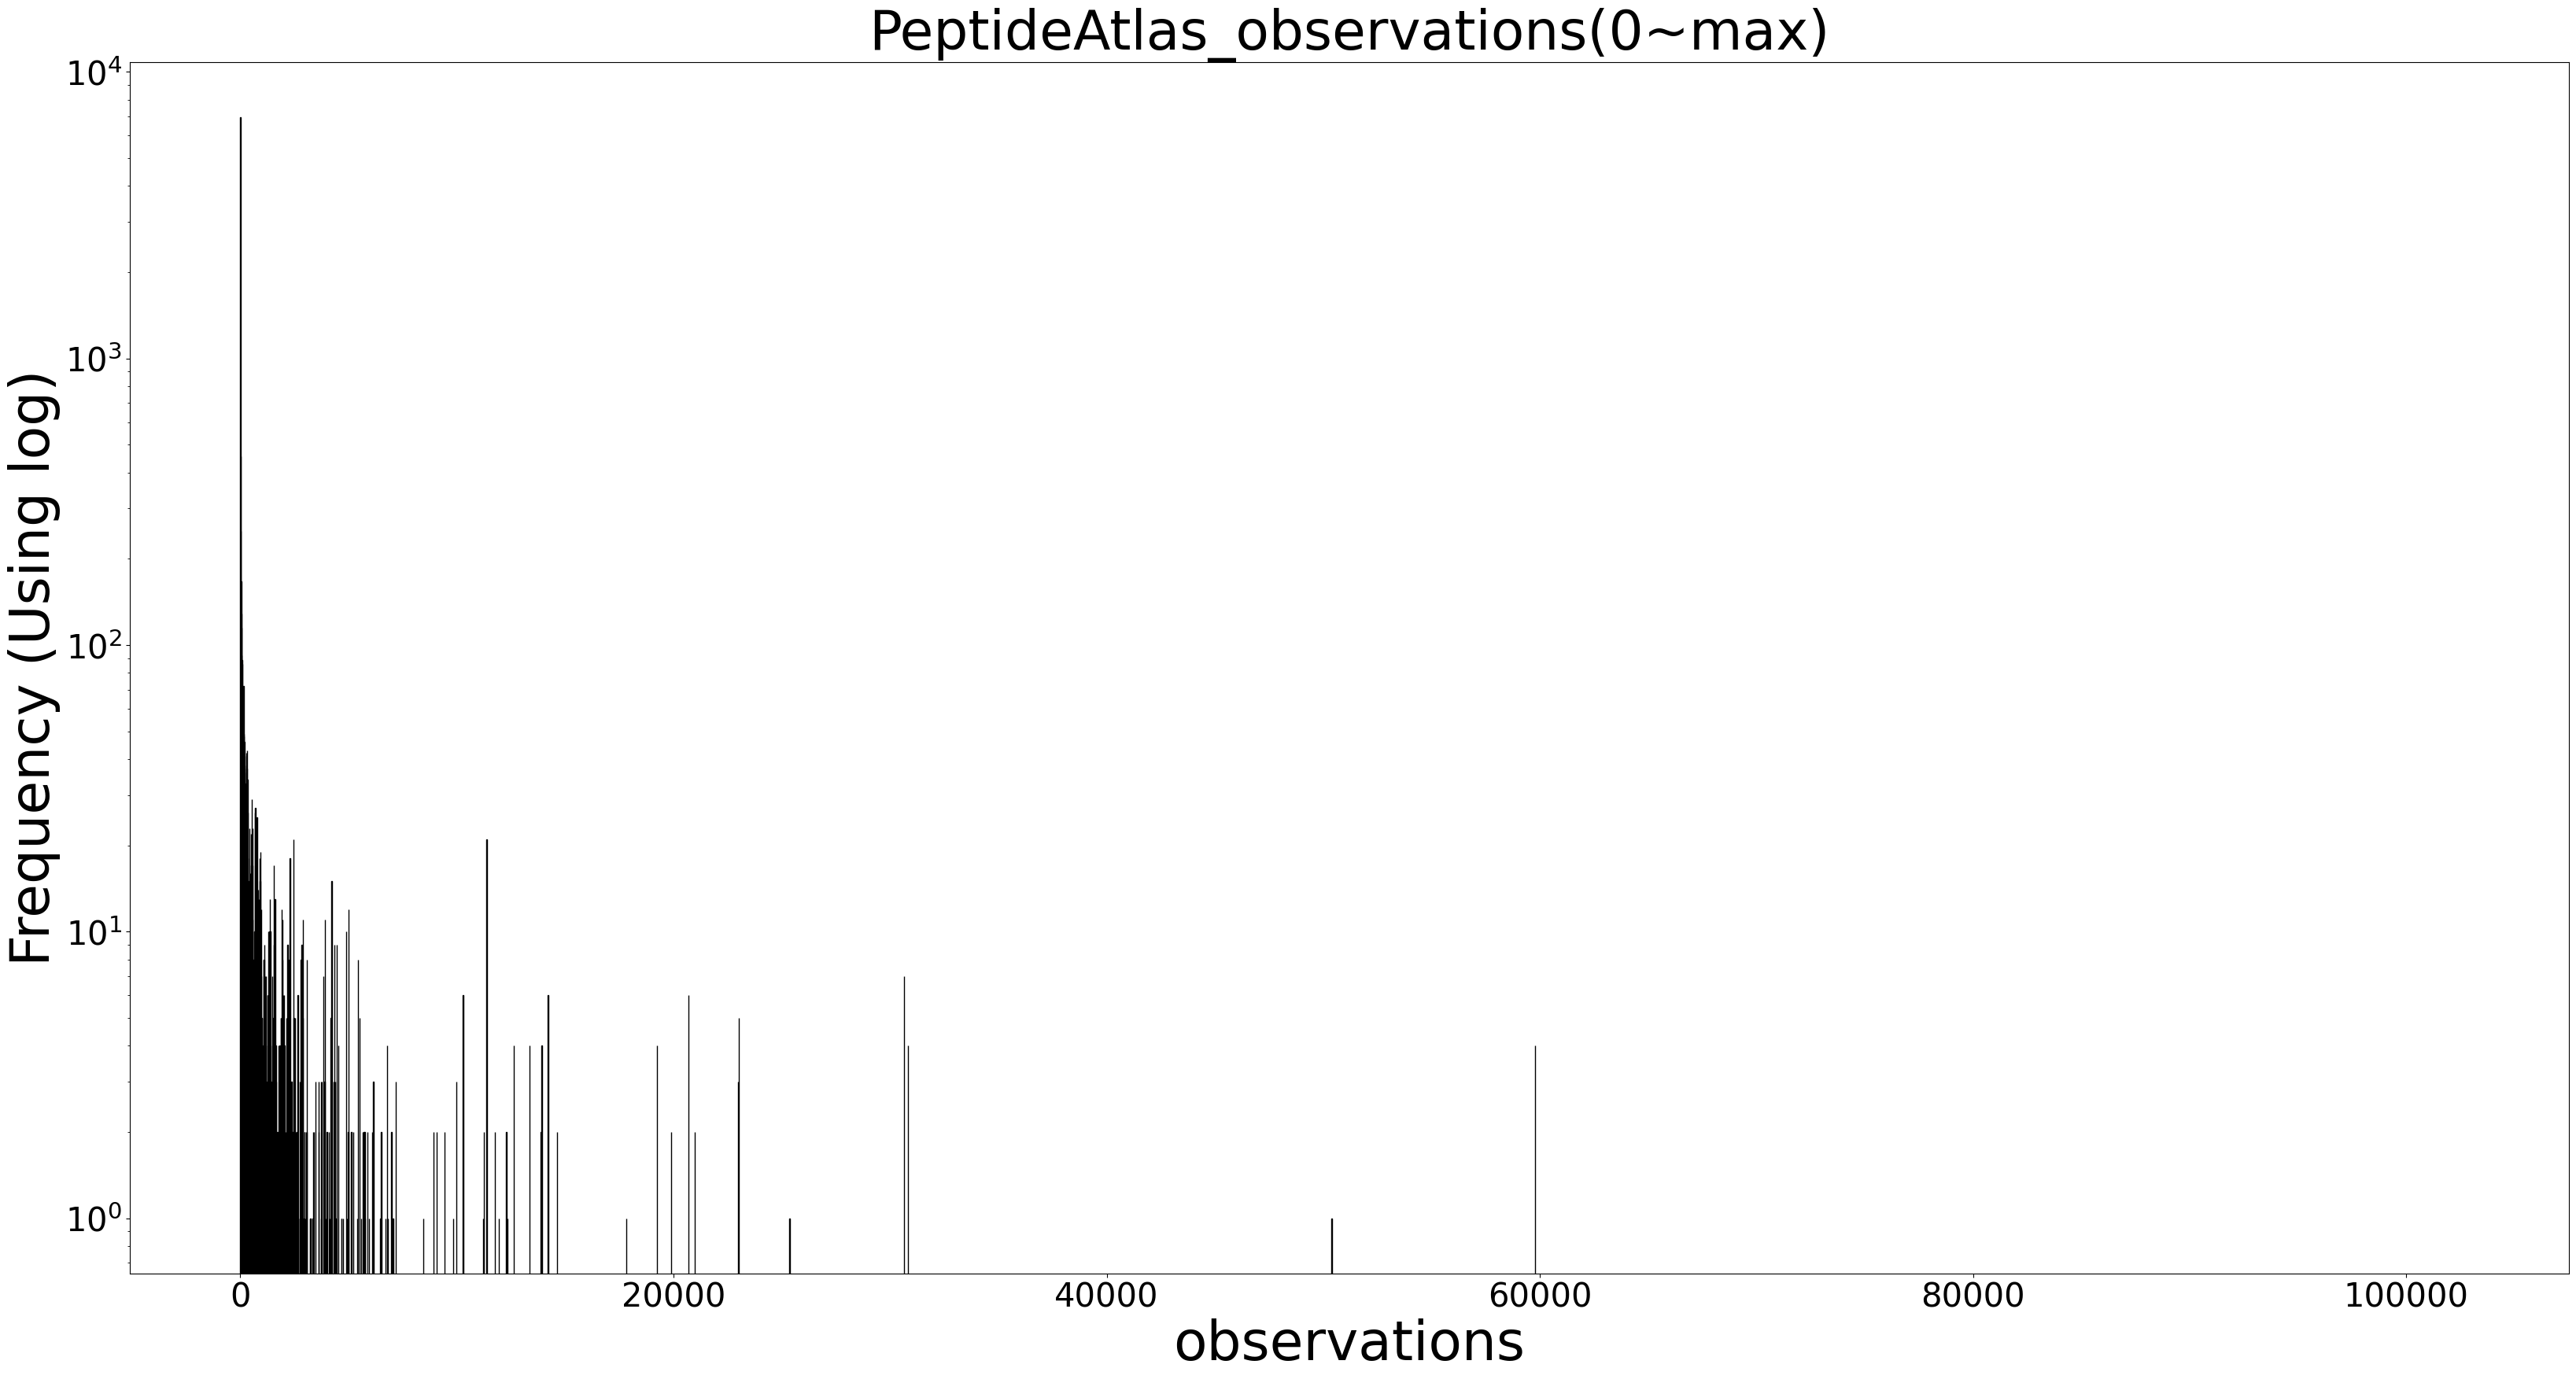

In [59]:
bins = range(0, format_df['PeptideAtlas_observations'].max(), 10)
plt.figure(figsize=(40, 20))
plt.hist(format_df['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(0~max)', fontsize=50)
plt.show()

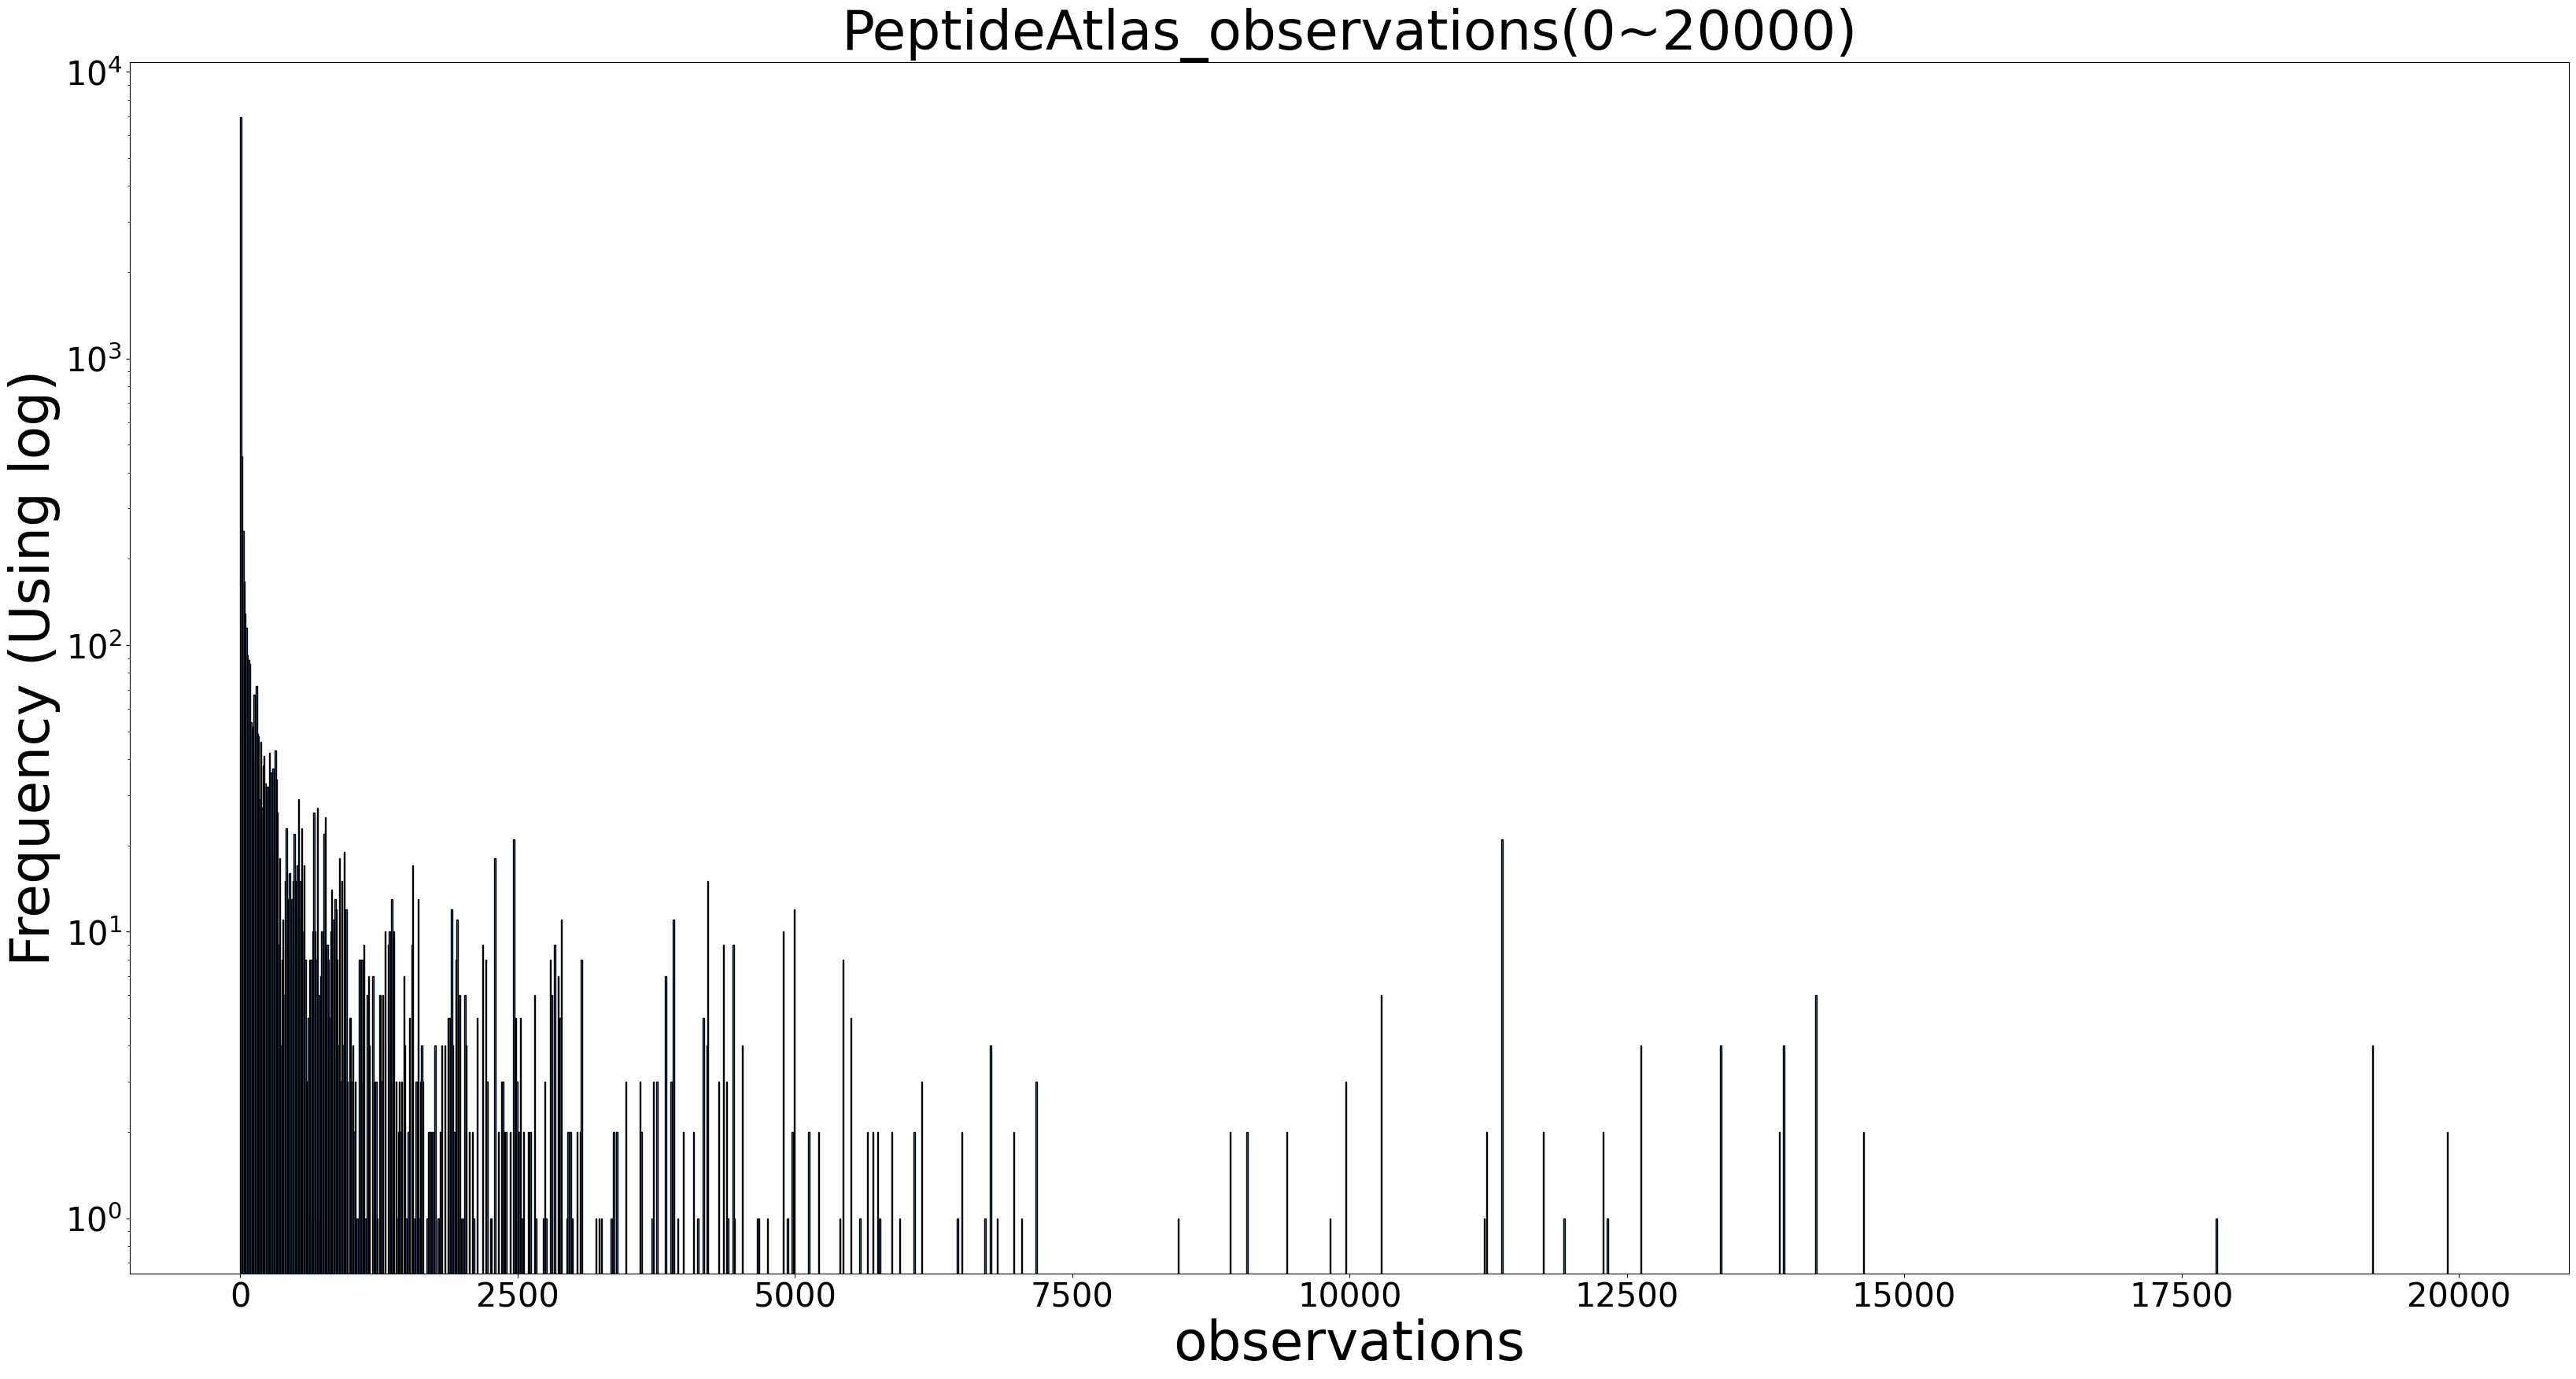

In [60]:
bins = range(0, 20000, 10)
plt.figure(figsize=(40, 20))
plt.hist(format_df['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(0~20000)', fontsize=50)
plt.show()

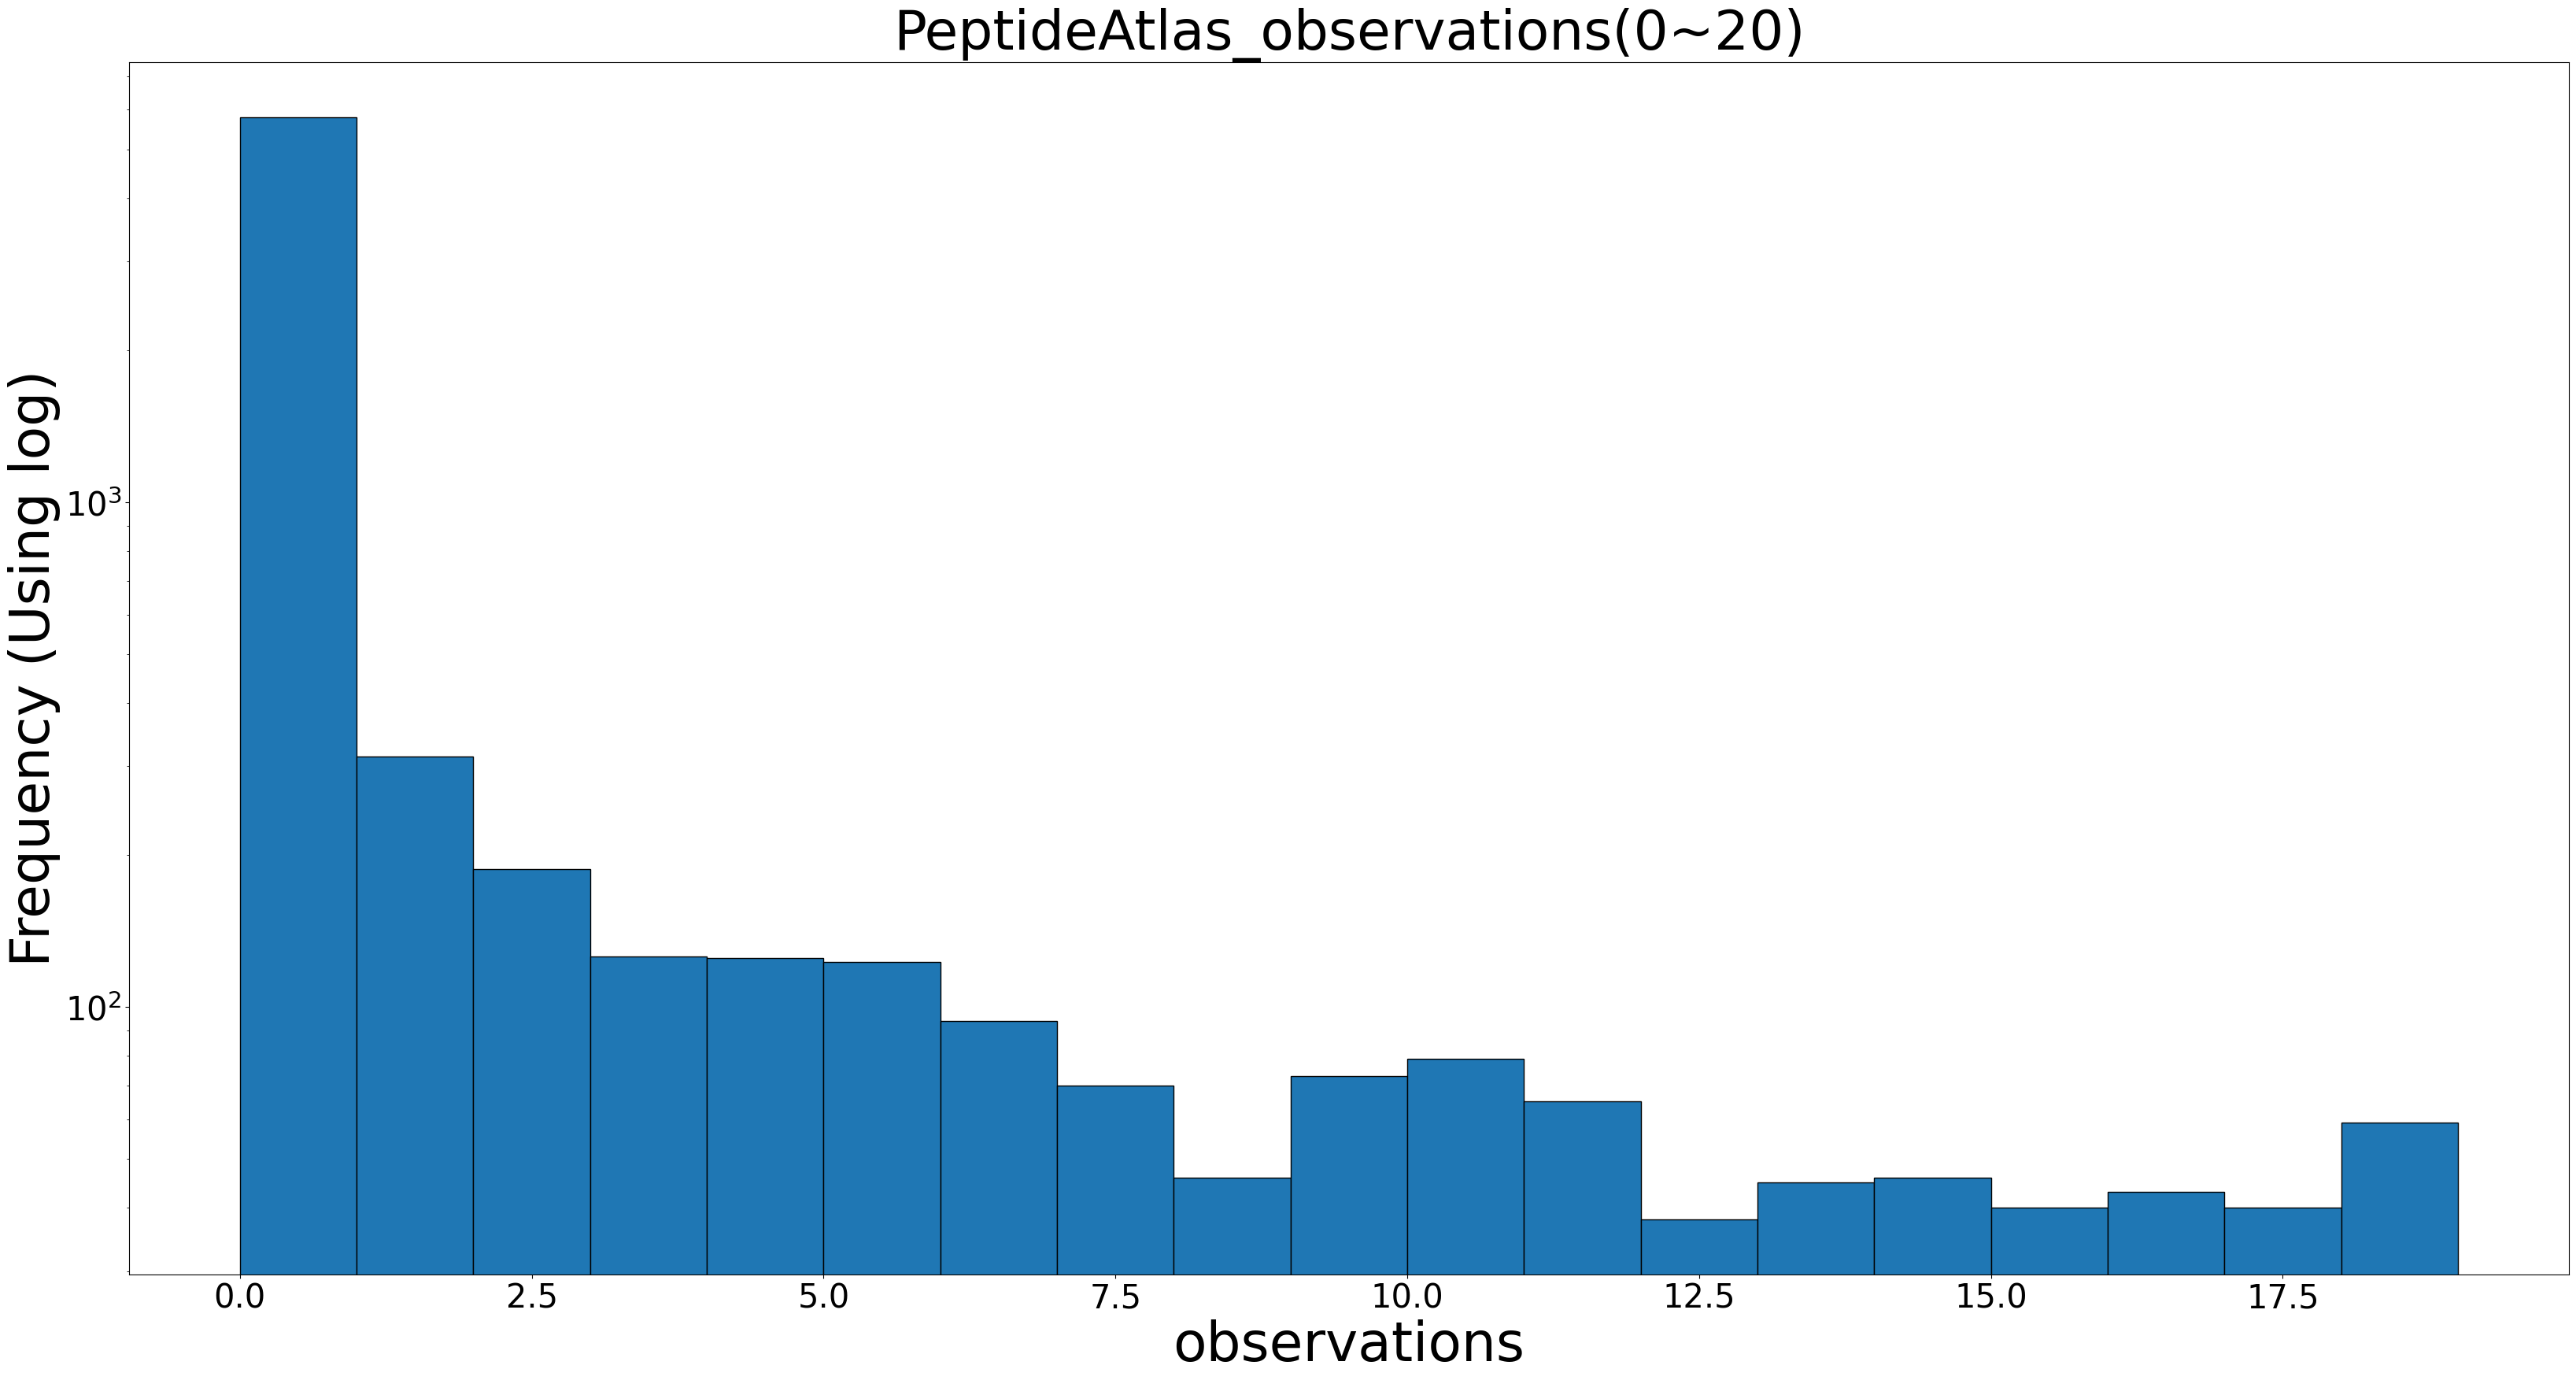

In [63]:
bins = range(0, 20, 1)
plt.figure(figsize=(40, 20))
plt.hist(format_df['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(0~20)', fontsize=50)
plt.show()

#### GPMDB_observations

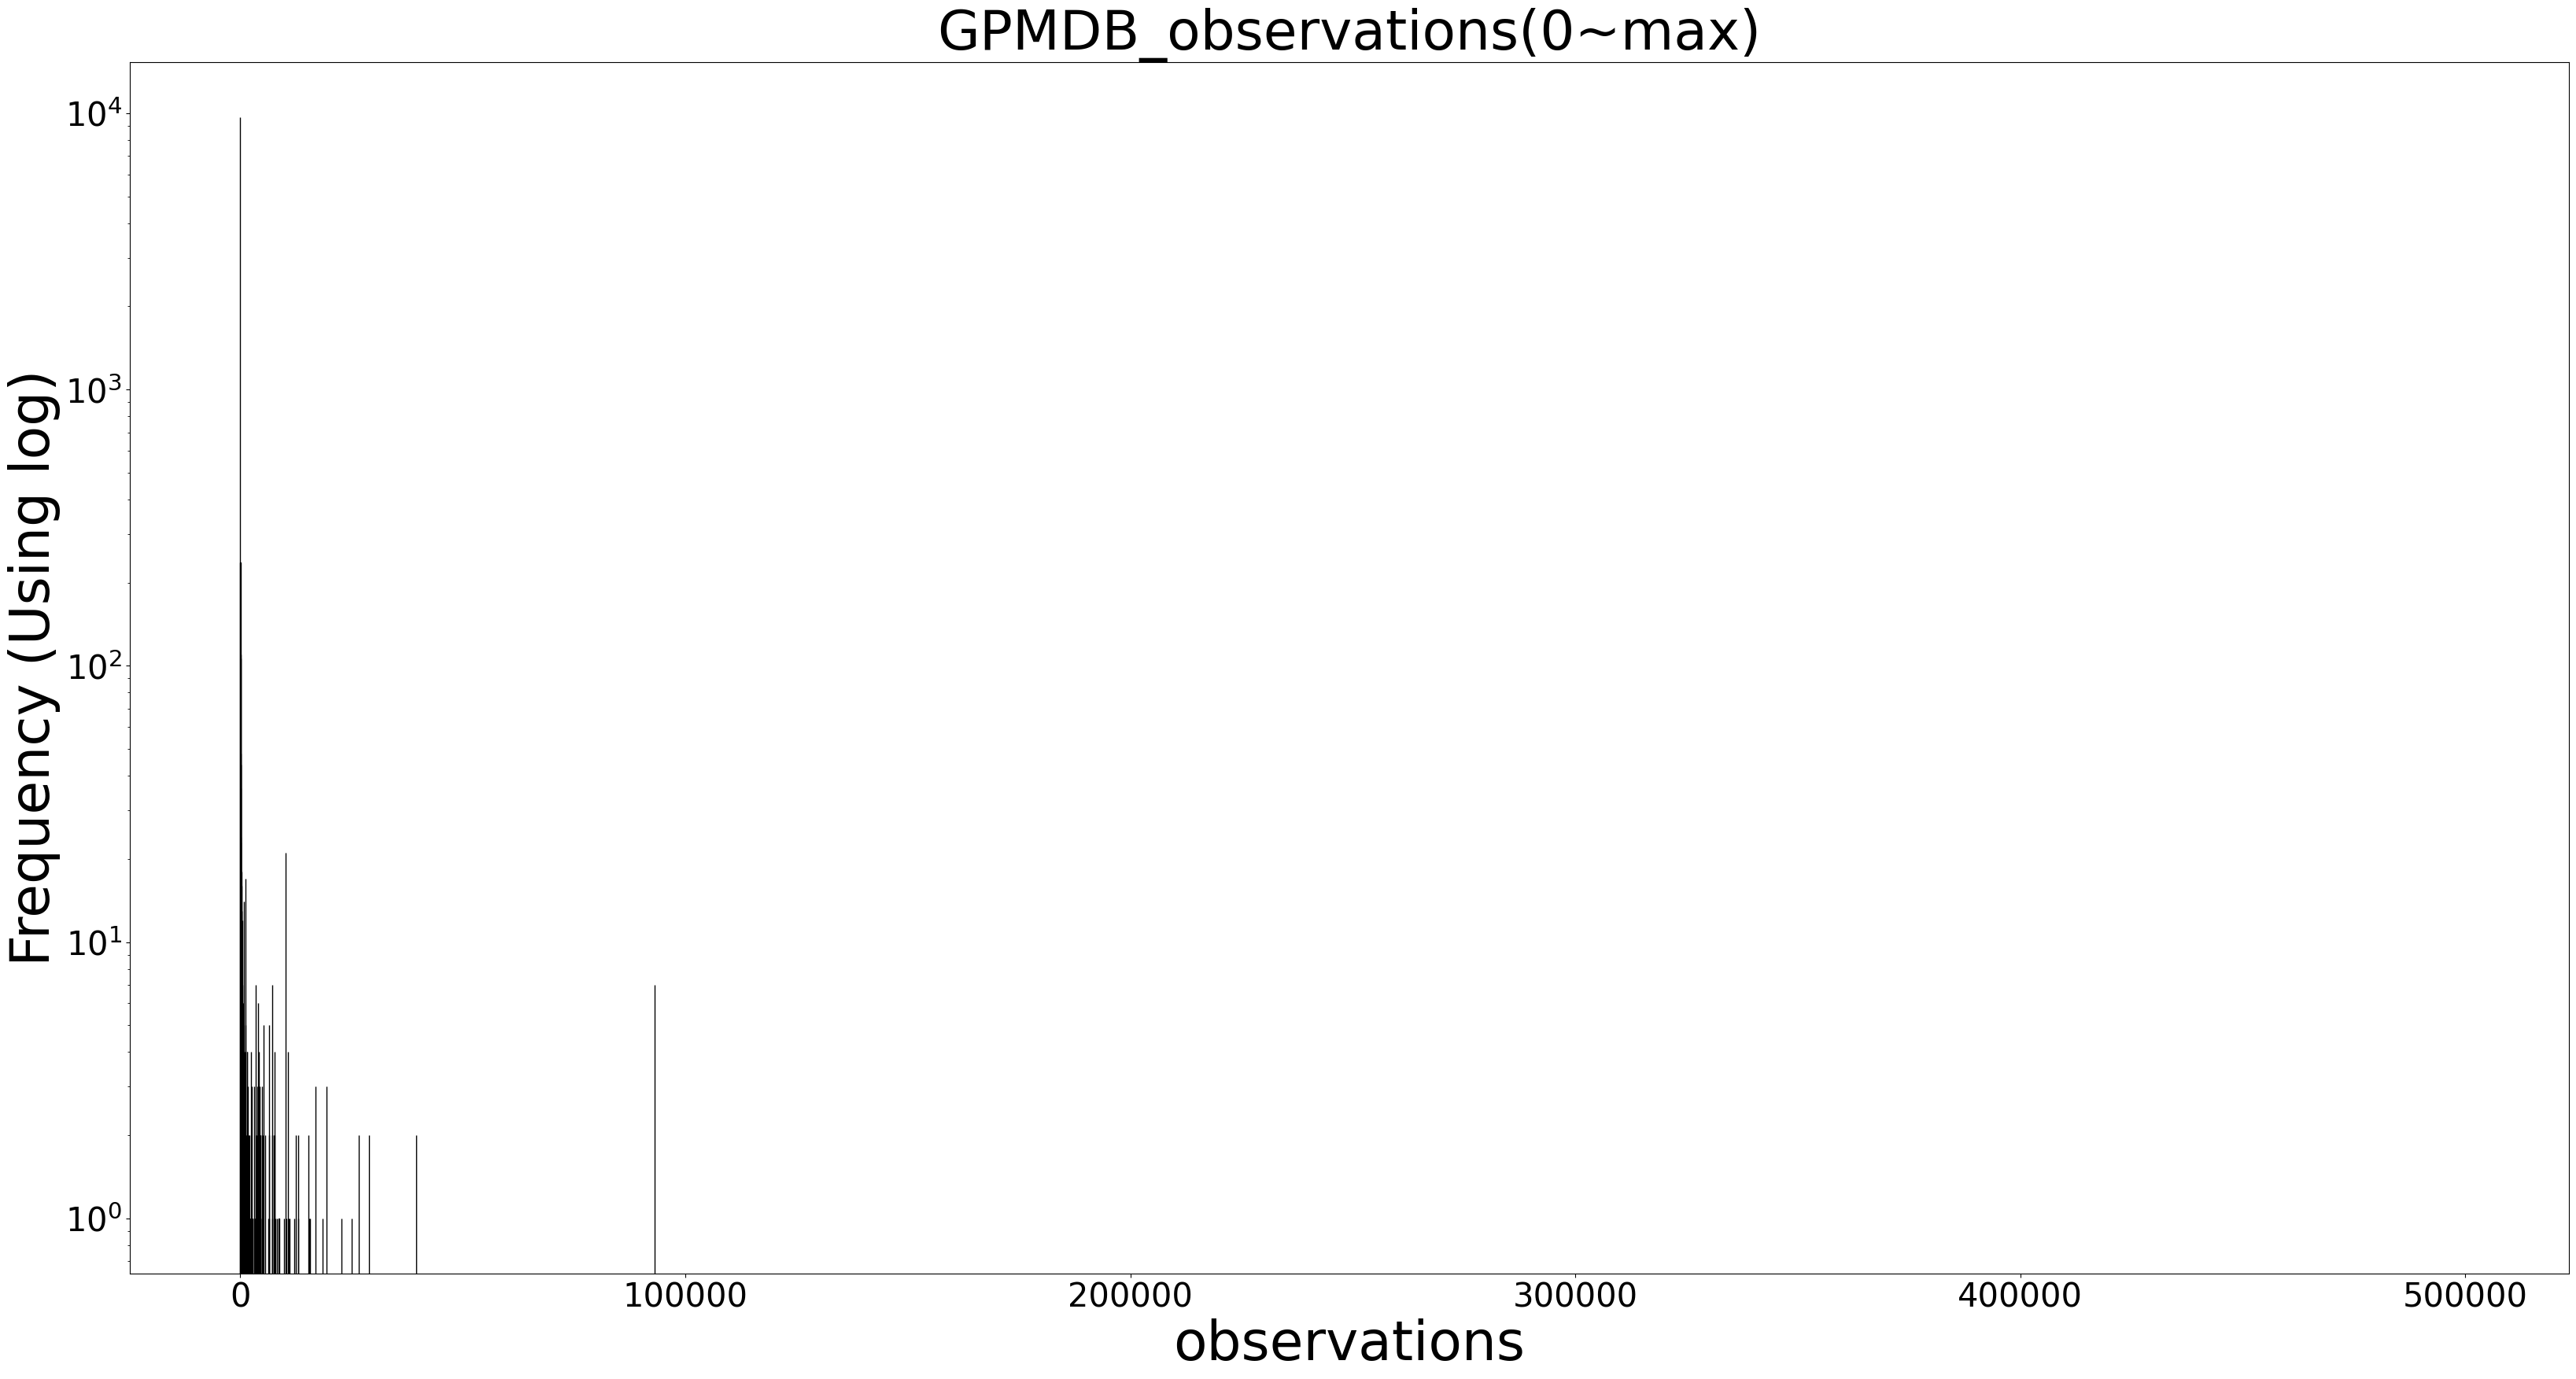

In [61]:
bins = range(0, format_df['GPMDB_observations'].max(), 10)
plt.figure(figsize=(40, 20))
plt.hist(format_df['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(0~max)', fontsize=50)
plt.show()

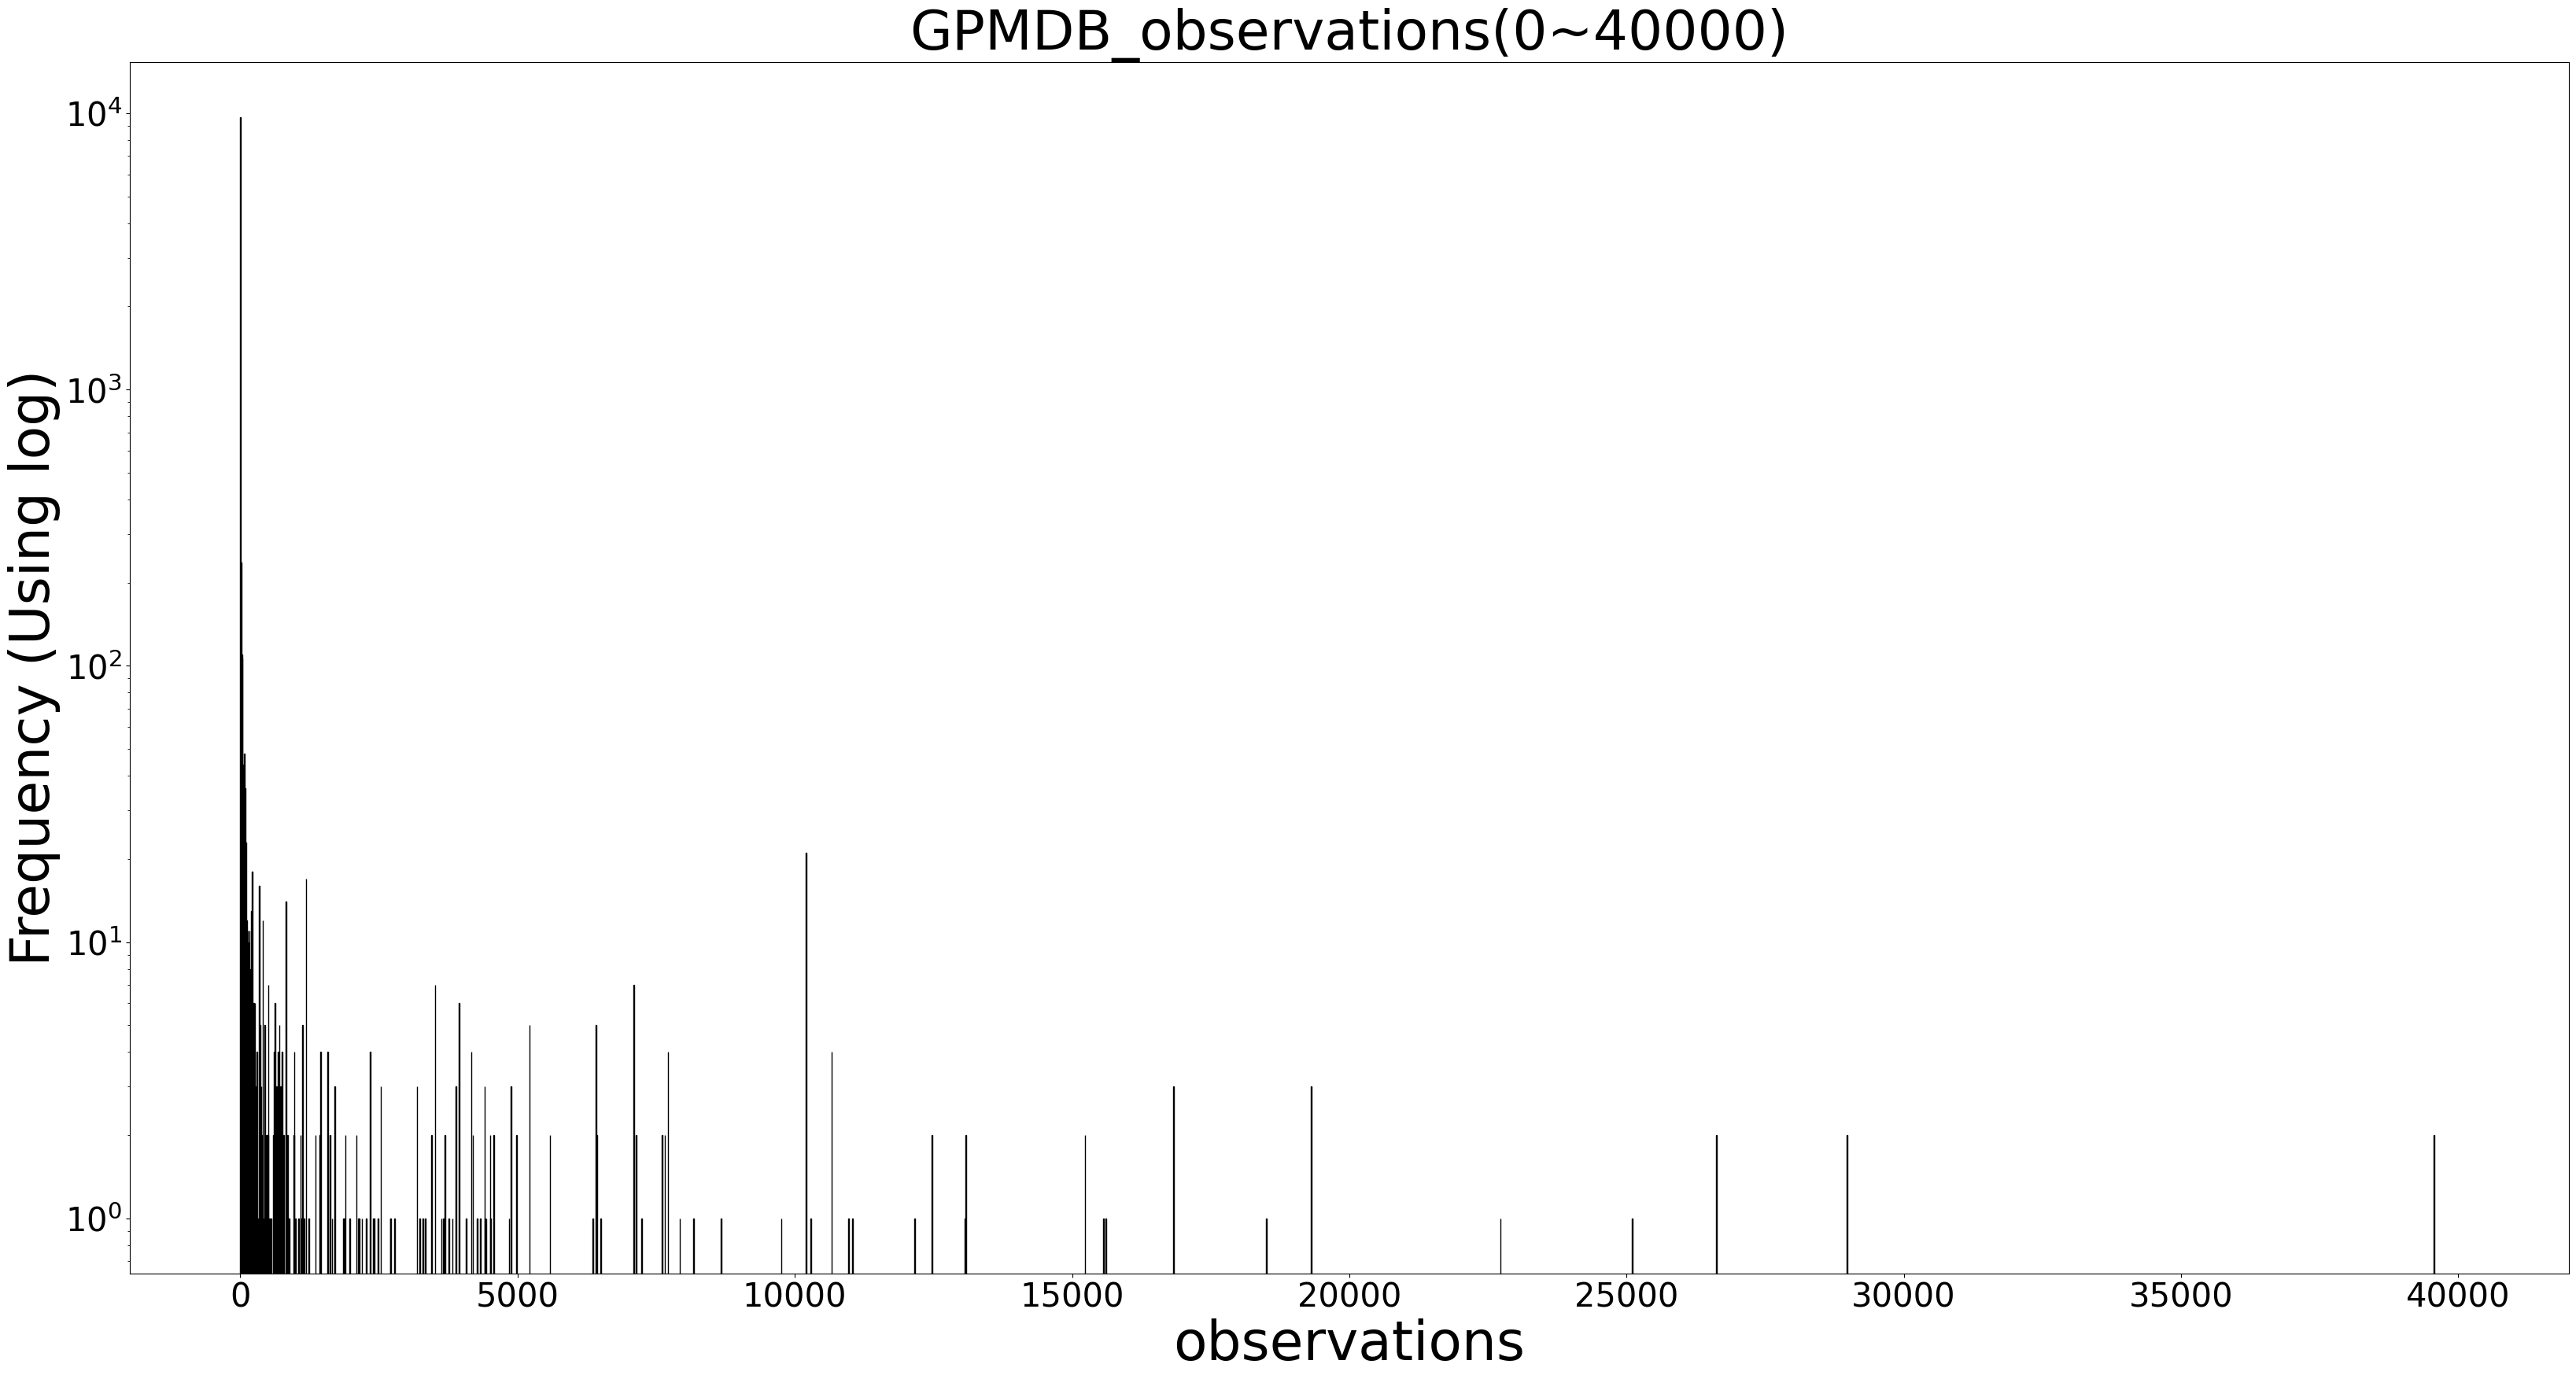

In [62]:
bins = range(0, 40000, 10)
plt.figure(figsize=(40, 20))
plt.hist(format_df['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(0~40000)', fontsize=50)
plt.show()

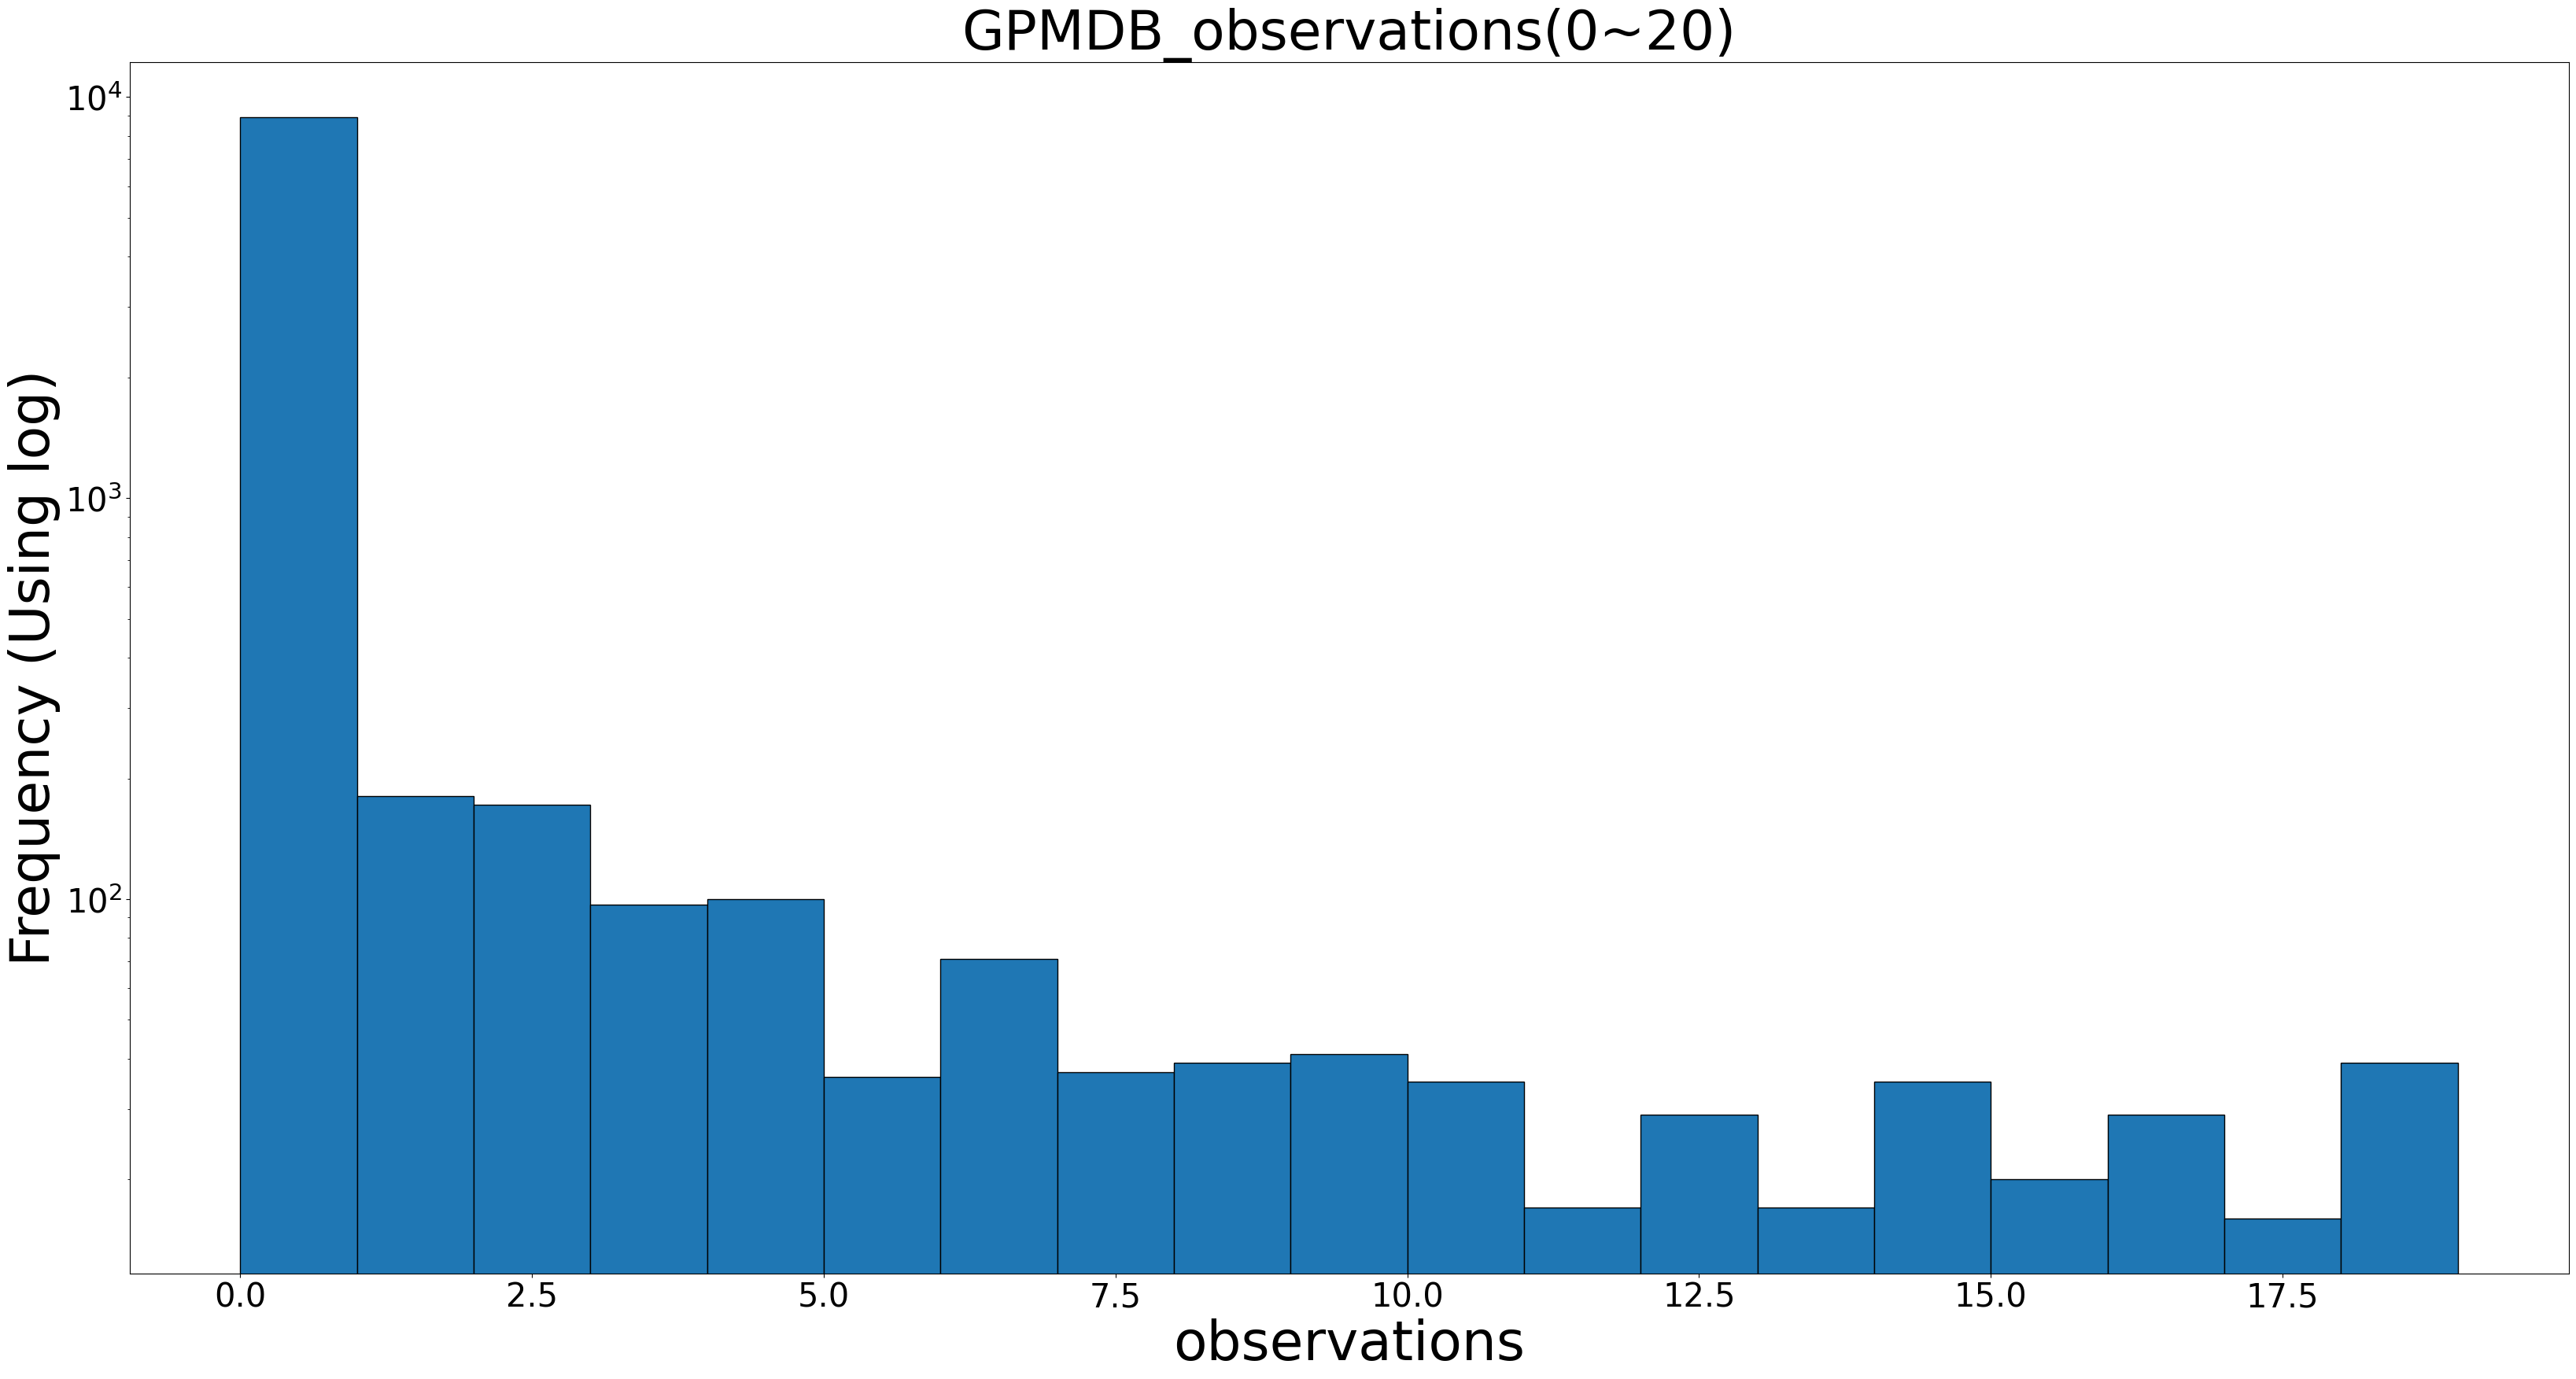

In [64]:
bins = range(0, 20, 1)
plt.figure(figsize=(40, 20))
plt.hist(format_df['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(0~20)', fontsize=50)
plt.show()